In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt

In [3]:
import scipy.stats as stats
from scipy.stats import t
from scipy.stats import norm
import math
import itertools
from itertools import combinations

In [4]:
lottery_data = pd.read_excel("649L.xlsx", header=None)

In [5]:
lottery_data.columns = ["Date", "Num1", "Num2", "Num3", "Num4", "Num5", "Num6", "Bonus"]

In [6]:
lottery_data.head()

,Date,Num1,Num2,Num3,Num4,Num5,Num6,Bonus
0,25th March 2023,11,12,13,16,22,28,27
1,22nd March 2023,2,7,9,11,39,41,48
2,18th March 2023,4,7,8,15,34,45,1
3,15th March 2023,4,9,26,27,28,33,30
4,11th March 2023,6,13,21,29,33,49,22


In [7]:
draw_means = lottery_data[["Num1", "Num2", "Num3", "Num4", "Num5", "Num6"]].mean(axis=1)

In [8]:
mean_of_means = draw_means.mean()
stds = lottery_data[["Num1", "Num2", "Num3", "Num4", "Num5", "Num6"]].std()
std_of_means = draw_means.std()
upper_bound = mean_of_means + (2 * std_of_means)
lower_bound = mean_of_means - (2 * std_of_means)

print(f"The mean of all the means is {mean_of_means}.")
print(f"The standard deviation of the means is {std_of_means}.")
print(f"The upper bound for 2 standard deviations is {upper_bound}.")
print(f"The lower bound for 2 standard deviations is {lower_bound}.")

The mean of all the means is 25.140467171717166.
The standard deviation of the means is 5.605415467559296.
The upper bound for 2 standard deviations is 36.351298106835756.
The lower bound for 2 standard deviations is 13.929636236598574.


In [9]:
conf_int = stats.norm.interval(0.95, loc=mean_of_means, scale=std_of_means)

Text(0, 0.5, 'Frequency')

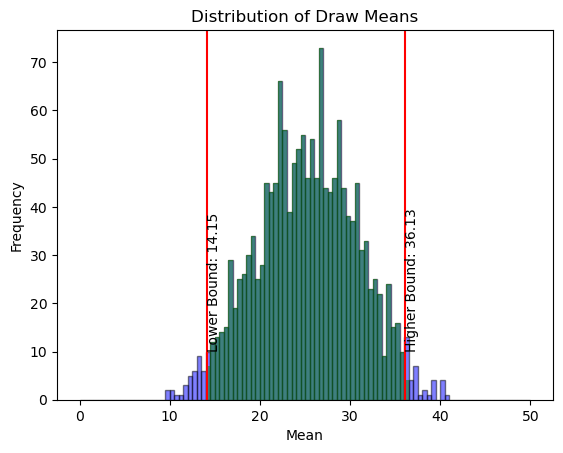

In [10]:
plt.hist(draw_means, bins=100, range=(0, 50), edgecolor="black", color="blue", alpha=0.5)
plt.hist(draw_means[draw_means.between(conf_int[0], conf_int[1])], bins=100, range=(0, 50), color="Green", alpha=0.5)
plt.axvline(x=conf_int[0], color="red")
plt.axvline(x=conf_int[1], color="red")
plt.text(conf_int[0], 10, f'Lower Bound: {conf_int[0]:.2f}', rotation=90, va='bottom')
plt.text(conf_int[1], 10, f'Higher Bound: {conf_int[1]:.2f}', rotation=90, va='bottom')

plt.title("Distribution of Draw Means")
plt.xlabel("Mean")
plt.ylabel("Frequency")


In [11]:
corr_df = lottery_data[["Num1", "Num2", "Num3", "Num4", "Num5", "Num6"]]

In [12]:
numbers = list(range(1, 51))
number_pairs = list(itertools.combinations(numbers, 2))

In [13]:
pair_frequencies = {}

for index, row in corr_df.iterrows():
    for pair in number_pairs:
        if pair[0] in row.values and pair[1] in row.values:
            if pair not in pair_frequencies:
                pair_frequencies[pair] = 1
            else:
                pair_frequencies[pair] += 1

In [14]:
pair_matrix = np.zeros((51, 51))

for i in range(1, 51):
    for j in range(1, 51):
        if i < j:
            if (i, j) in pair_frequencies:
                pair_matrix[i-1, j-1] = pair_frequencies[(i, j)]
                pair_matrix[j-1, i-1] = pair_frequencies[(i, j)]

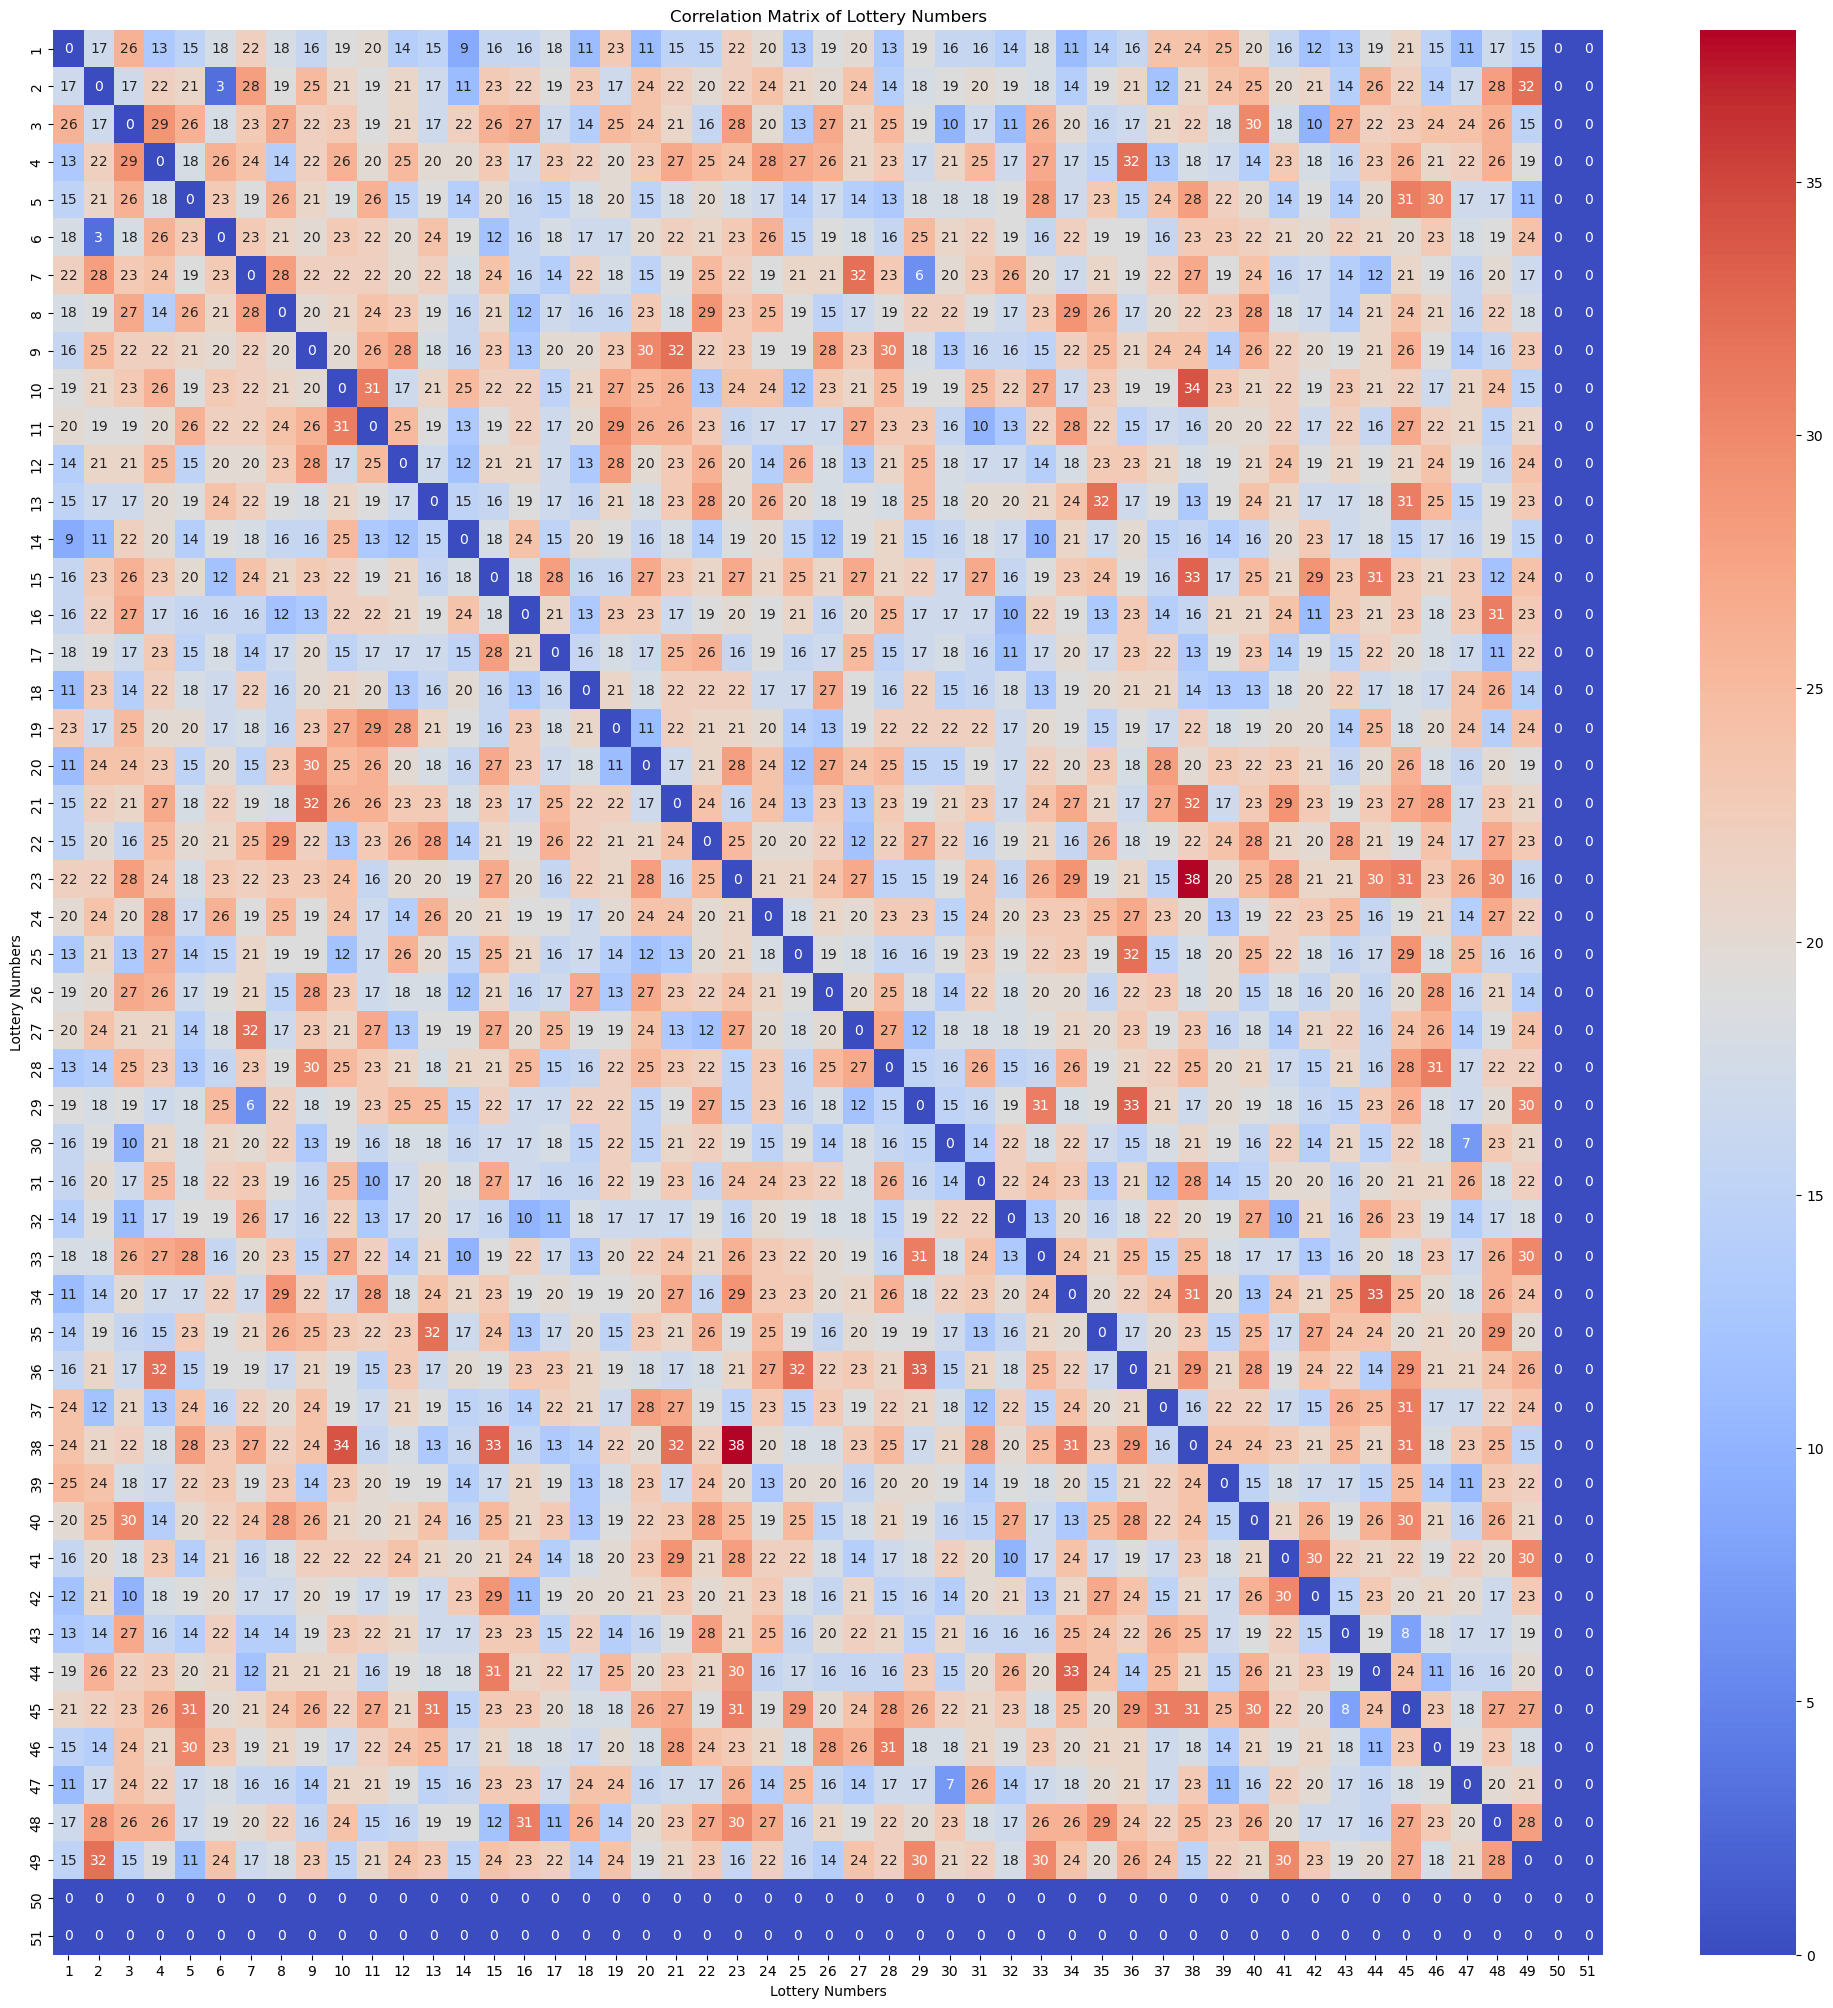

In [15]:
plt.figure(figsize=(25, 25))
sns.heatmap(pair_matrix, cmap='coolwarm', annot=True, fmt='g')
plt.title('Correlation Matrix of Lottery Numbers')
plt.xlabel('Lottery Numbers')
plt.ylabel('Lottery Numbers')
plt.xticks(np.arange(51) + 0.5, np.arange(1,52))
plt.yticks(np.arange(51) + 0.5, np.arange(1,52))
plt.savefig("heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

In [16]:
#Check if have drawn

In [ ]:
def check_duplicate(numbers):
    # Check if the numbers have been drawn before in any row of the DataFrame
    rows = lottery_data.loc[(lottery_data['Num1'] == numbers[0]) & (lottery_data['Num2'] == numbers[1]) & 
                  (lottery_data['Num3'] == numbers[2]) & (lottery_data['Num4'] == numbers[3]) &
                  (lottery_data['Num5'] == numbers[4]) & (lottery_data['Num6'] == numbers[5])]
    
    # If the numbers have been drawn before, print the date(s) of the draw(s)
    if not rows.empty:
        for i, row in rows.iterrows():
            print(f"The numbers {numbers} were drawn on {row['Date']}.")
            return True
    
    # If the numbers haven't been drawn before, return False
    return False

# Define a function to prompt the user to enter a set of 6 numbers
def enter_numbers():
    # Prompt the user to enter a set of 6 numbers
    print("Enter a set of 6 numbers (between 1 and 49):")
    num1 = int(input("Number 1: "))
    num2 = int(input("Number 2: "))
    num3 = int(input("Number 3: "))
    num4 = int(input("Number 4: "))
    num5 = int(input("Number 5: "))
    num6 = int(input("Number 6: "))
    numbers = [num1, num2, num3, num4, num5, num6]
    
    # Check if the numbers have been drawn before
    if check_duplicate(numbers):
        return
    
    # If the numbers haven't been drawn before, print a message
    print(f"The numbers {numbers} have not been drawn before.")

# Call the enter_numbers function to prompt the user to enter a set of numbers
enter_numbers()